# MP/BME 574: Homework Set 3

In [4]:
## MP 574 HW3
##
%matplotlib inline
import numpy as np
import numpy.linalg as la
import matplotlib.pyplot as plt
from IPython.display import display, Image
import matplotlib.image as mpimg
from os.path import dirname, join as pjoin
from scipy import signal
import scipy.io as sio
import scipy.optimize as opt
import numpy.random as rnd

font = {'weight' : 'normal',
        'size'   : 20}

In [9]:
def evalGradients(x):

    A = np.array([[1, 2, 3], 
    [0, 2, 1],
    [4, 0, 1]])
    
    C = np.diag([20,20,20])
    
    Q = (A.T).dot(C.dot(A))
    
    d = np.array([[100], 
    [100],
    [100]])

    f = 0.5*(x.T).dot(Q.dot(x)) - (x.T).dot(d)

    g = Q.dot(x) - d
    
    H = Q
    
    return f,g


In [ ]:
data_dir = pjoin('.', 'data')
mat_fname = pjoin(data_dir, 'hw3_problem1.mat')
mat_contents = sio.loadmat(mat_fname)
mat_contents
b = mat_contents['b']
m = mat_contents['m']
sx = len(b)
sy = len(b[:])


#fig2 = plt.figure()
#imgplot = plt.imshow(abs(f),cmap='gray')

Algorithm: Steepest Descent
Done
[[-48.46938776]]
[[ 0.45918366]
 [ 1.27551017]
 [-0.76530609]]


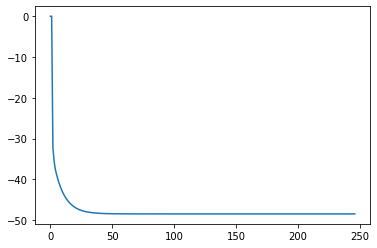

In [10]:
print('Algorithm: Steepest Descent')
x = np.array([[0],[0],[0]])
f,g,H = evalGradients(x)
allx = x
allf = f
niter = 500
for k in range(0,niter):
    f,g,H = evalGradients(x)
    if la.norm(g)>0.000001:
        d = -g
        a0 = 0
        b0 = 1
        for kg in range(0,200):
            a1 = x + d*a0 + d*(b0-a0)*0.382;
            b1 = x + d*a0 + d*(b0-a0)*0.618;
            fa1,temp1,temp2 = evalGradients(a1);
            fb1,temp1,temp2 = evalGradients(b1);
            if fb1<fa1:
                a0 = a0 + 0.382*(b0-a0);
            else:
                b0 = a0 + 0.618*(b0-a0);
                    
              
        alpha = (a0+b0)/2;
        allx = np.concatenate((allx,x),axis=1)
        allf = np.concatenate((allf,f),axis=1)
        x = x +alpha*d;
        
        
print('Done')
print(f)
print(x)
plt.plot(allf.T)

Algorithm: Conjugate Gradients
Done
[[-48.46938776]]
[[ 0.45918367]
 [ 1.2755102 ]
 [-0.76530612]]


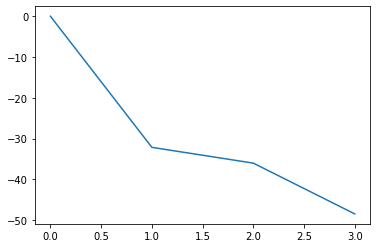

In [11]:
print('Algorithm: Conjugate Gradients')
x = np.array([[0],[0],[0]])
f,g,Q = evalGradients(x)
allx = x
allf = f
niter = 500
if la.norm(g)>0.000001:
    d = -g
    k=0;
    while k < niter:
        a = -((g.T).dot(d))/((d.T).dot(Q.dot(d)));
        x = x + a*d;
        f,g,Q = evalGradients(x)
        allx = np.concatenate((allx,x),axis=1)
        allf = np.concatenate((allf,f),axis=1)
        if la.norm(g)>0.000001:
            b = ((g.T).dot(Q.dot(d)))/((d.T).dot(Q.dot(d)));
            d = -g + b*d;
        else:
            k = niter
        k = k+1
   
        
print('Done')
print(f)
print(x)
plt.plot(allf.T)

Algorithm: Newton
Done
[[-48.46938776]]
[[ 0.45918367]
 [ 1.2755102 ]
 [-0.76530612]]


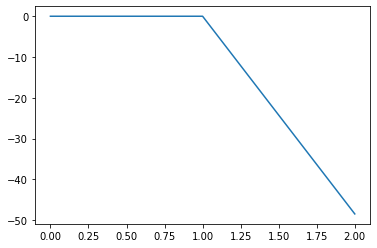

In [12]:
print('Algorithm: Newton')
x = np.array([[0],[0],[0]])
f,g,H = evalGradients(x)
allx = x
allf = f
niter = 500
k = 0
while k < niter:
    f,g,H = evalGradients(x)
    allx = np.concatenate((allx,x),axis=1)
    allf = np.concatenate((allf,f),axis=1)        
    if la.norm(g)>0.000001:
        x = x - la.inv(H).dot(g)
    else: 
        k=niter
    k=k+1    
    
print('Done')
print(f)
print(x)
plt.plot(allf.T)
